As suggested by Francois, I will look at the Gaia DR2 IERS sample with an extra criteria of $G \lt 18.3$.

In [1]:
from astropy.table import Table
from astropy import units as u
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = "svg"
# My module
from my_progs.catalog.read_gaia import read_dr2_iers
from my_progs.catalog.pos_err import pos_err_calc

In [2]:
gdr2 = read_dr2_iers()
gdr2

iers_name,source_id,ra,ra_err,dec,dec_err,pos_err,parallax,parallax_err,pmra,pmra_err,pmdec,pmdec_err,ra_dec_corr,ra_parallax_corr,ra_pmra_corr,ra_pmdec_corr,dec_parallax_corr,dec_pmra_corr,dec_pmdec_corr,parallax_pmra_corr,parallax_pmdec_corr,pmra_pmdec_corr,astrometric_n_obs_al,phot_g_mean_mag,phot_bp_mean_mag,phot_rp_mean_mag
,,deg,mas,deg,mas,mas,mas,mas,mas / yr,mas / yr,mas / yr,mas / yr,,,,,,,,,,,,mag,mag,mag
bytes8,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int32,float32,float32,float32
2357-326,2314315845817748992,0.08499783888929553,0.1445922512977904,-32.35034287416735,0.12064481144837098,0.1459297058023392,0.2031436388244911,0.18931038055012414,-0.036379976508171166,0.2996915751383218,0.07511508120986538,0.2477794651372806,-0.092771634,0.3238576,0.26209354,-0.09424034,-0.37053558,-0.016644478,0.23910828,-0.04301203,-0.20278661,0.06913886,168,18.07359,18.252312,17.669233
2358-161,2415835442333250688,0.2722030739253465,0.20602077902948293,-15.851965536926414,0.1283223830435575,0.20605283885027792,-0.055558146475727405,0.24401150977786393,-0.2358559729612182,0.3893762964882165,-0.6856420405574464,0.29947031486611997,0.02216497,0.3860851,0.3694782,-0.18911926,-0.25913212,0.07878281,0.59325767,-0.21182266,-0.5026838,0.31012946,223,18.266418,18.379673,17.891047
2359-221,2340552087337605248,0.5499220984388309,0.4830680409810676,-21.8860734515098,0.3214542550971185,0.4831047772372843,-1.2254791228136077,0.5329940012064253,-0.034637706078405564,0.8855496468586489,-0.05961199228747711,0.7657056040084157,-0.013836138,0.39026165,0.44715494,-0.10128507,-0.081793234,0.007855844,0.5445474,-0.060944,-0.17351532,0.21098249,233,19.258053,19.407907,17.85715
0000-199,2365814049884978048,0.8164555380378795,0.31214484752059934,-19.697333393384483,0.20132065134575663,0.31218319151974,-0.24976210176238237,0.36241695927078477,0.6167410883691041,0.5467370543754372,-0.20622857222487195,0.4638258235243829,0.01857697,0.46789265,0.3675997,-0.17307134,-0.20771366,0.066310346,0.5528602,-0.10075016,-0.40074503,0.2787808,220,19.058247,19.314455,18.64363
0000-197,2365855384650325376,0.8278123681512258,0.2387757610163772,-19.456209949035525,0.1922200644996743,0.24241216451703895,-0.45544305828221626,0.3185109654739551,0.6116734571782345,0.5735415853774198,0.37085954108422414,0.39878223344506625,0.13461179,0.052950118,0.35212186,-0.022328816,-0.097155325,-0.019389542,0.2804625,-0.1926077,-0.35069835,0.24758662,212,19.193932,19.635006,18.525171
0001-120,2421598528234887680,1.0204794846922574,0.3102386470908995,-11.816218379326092,0.29214212886423696,0.33998919727933147,0.06584825341243254,0.3640494710474267,0.049237658462576495,0.7606129274645607,0.44519648557145636,0.7265389349874076,0.26688337,0.16208343,0.33467895,0.089694664,-0.13309994,0.2532729,0.7076963,-0.11914465,-0.22260411,0.5138607,183,19.32226,19.66084,18.616665
0001+459,387054966590038656,1.0671982239853723,0.7718284266351787,46.25499167308568,0.6969576827283192,0.777985787941841,-0.029368229696100832,1.0984495193905532,0.9944652987116404,1.2381622163997819,0.4579145221304079,0.9951609005577559,-0.06277916,0.42371804,-0.60506684,0.19084497,0.07386451,0.025139727,-0.6068582,-0.4637956,0.30770168,-0.2570573,202,20.491125,20.788141,19.799097
0002-478,4978016560925910400,1.1485644787260738,0.32535001967377664,-47.60544549244506,0.38175267275937685,0.4046925099699907,-0.394507921304075,0.5551341682993441,0.10766725569112054,0.5623357858130931,-0.2990603581366252,0.6935629455335646,-0.2602696,0.38209838,-0.3261622,-0.043664124,-0.36382514,0.12289763,-0.07530141,-0.16826801,-0.2654429,-0.06584475,296,19.847563,19.998808,19.225542


In [3]:
print("For all {} quasar in the sample, the median formal error is".format(len(gdr2)))
print("    R.A.: {:.3f} mas".format(np.median(gdr2["ra_err"])))
print("    Decl: {:.3f} mas".format(np.median(gdr2["dec_err"])))
print("    EEMA: {:.3f} mas".format(np.median(gdr2["pos_err"])))

For all 2820 quasar in the sample, the median formal error is
    R.A.: 0.233 mas
    Decl: 0.211 mas
    EEMA: 0.264 mas


/usr/local/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:745: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedColumn.
  a.partition(kth, axis=axis, kind=kind, order=order)


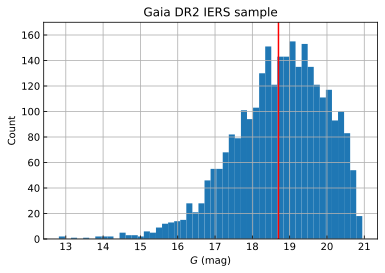

In [4]:
plt.hist(gdr2["phot_g_mean_mag"], 50)
plt.vlines(18.7, 0, 170, "r")
plt.ylim([0, 170])
plt.xlabel("$G$ (mag)")
plt.ylabel("Count")
plt.title("Gaia DR2 IERS sample")
plt.grid()

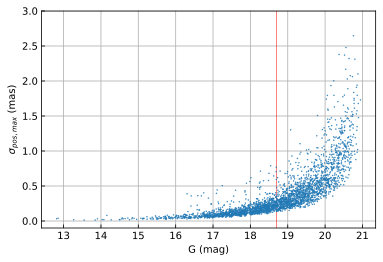

In [5]:
fig, ax = plt.subplots()

ax.plot(gdr2["phot_g_mean_mag"], gdr2["pos_err"], ".", ms=1)
ax.set_xlabel("G (mag)")
ax.set_ylabel("$\\sigma_{pos,max}$ (mas)")
ax.set_ylim([-0.1, 3])
ax.vlines(18.7, -0.1, 3, "r", lw=0.5)
ax.grid()

In [6]:
mask = (gdr2["phot_g_mean_mag"] < 18.7)
gdr2bgt = gdr2[mask]
gdr2bgt.filled()

mask = (gdr2["phot_g_mean_mag"] >= 18.7)
gdr2drk = gdr2[mask]
gdr2drk.filled()

print("For {} quasar with G < 18.7, the median formal error is".format(len(gdr2bgt)))
print("    R.A.: {:.3f} mas".format(np.median(gdr2bgt["ra_err"])))
print("    Decl: {:.3f} mas".format(np.median(gdr2bgt["dec_err"])))
print("    EEMA: {:.3f} mas".format(np.median(gdr2bgt["pos_err"])))

print("For {} quasar with G >= 18.7, the median formal error is".format(len(gdr2drk)))
print("    R.A.: {:.3f} mas".format(np.median(gdr2drk["ra_err"])))
print("    Decl: {:.3f} mas".format(np.median(gdr2drk["dec_err"])))
print("    EEMA: {:.3f} mas".format(np.median(gdr2drk["pos_err"])))

For 1288 quasar with G < 18.7, the median formal error is
    R.A.: 0.120 mas
    Decl: 0.109 mas
    EEMA: 0.136 mas
For 1532 quasar with G >= 18.7, the median formal error is
    R.A.: 0.408 mas
    Decl: 0.361 mas
    EEMA: 0.456 mas


There are 1288 quasars with $G \lt 18.7$.

In [7]:
print("For {} quasar with G < 18.7, the median formal error is".format(len(gdr2bgt)))
print("    R.A.: {:.3f} mas".format(np.median(gdr2bgt["ra_err"])))
print("    Decl: {:.3f} mas".format(np.median(gdr2bgt["dec_err"])))
print("    EEMA: {:.3f} mas".format(np.median(gdr2bgt["pos_err"])))

print("For {} quasar with G >= 18.7, the median formal error is".format(len(gdr2drk)))
print("    R.A.: {:.3f} mas".format(np.median(gdr2drk["ra_err"])))
print("    Decl: {:.3f} mas".format(np.median(gdr2drk["dec_err"])))
print("    EEMA: {:.3f} mas".format(np.median(gdr2drk["pos_err"])))

For 1288 quasar with G < 18.7, the median formal error is
    R.A.: 0.120 mas
    Decl: 0.109 mas
    EEMA: 0.136 mas
For 1532 quasar with G >= 18.7, the median formal error is
    R.A.: 0.408 mas
    Decl: 0.361 mas
    EEMA: 0.456 mas


Text(0.5, 1.0, 'G >= 18.7')

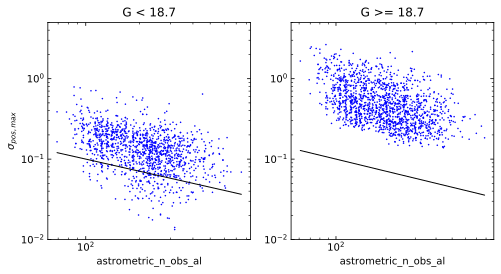

In [8]:
fig, (ax0, ax1) = plt.subplots(figsize=(8, 4), ncols=2)

# Bright quasars
# eema vs NO. obs
ax0.plot(gdr2bgt["astrometric_n_obs_al"], gdr2bgt["pos_err"], "bx", ms=1)

# Gaussian-like formal
y = 1 / np.sqrt(gdr2bgt["astrometric_n_obs_al"])
ax0.plot(gdr2bgt["astrometric_n_obs_al"], y, "k-", label="", lw=1)

ax0.set_yscale("log")
ax0.set_xscale("log")
ax0.set_xlabel("astrometric_n_obs_al")
ax0.set_ylabel("$\\sigma_{pos,max}$")
ax0.set_ylim([0.01, 5])
ax0.yaxis.set_ticks_position("both")
ax0.xaxis.set_ticks_position("both")
# ax0.legend()
ax0.set_title("G < 18.7")

# Faint quasars
# eema vs NO. obs
ax1.plot(gdr2drk["astrometric_n_obs_al"], gdr2drk["pos_err"], "bx", ms=1)

# Gaussian-like formal
y = 1 / np.sqrt(gdr2drk["astrometric_n_obs_al"])
ax1.plot(gdr2drk["astrometric_n_obs_al"], y, "k-", label="", lw=1)

ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.set_xlabel("astrometric_n_obs_al")
ax1.set_ylim([0.01, 5])
ax1.yaxis.set_ticks_position("both")
ax1.xaxis.set_ticks_position("both")
ax1.set_title("G >= 18.7")

In [9]:
mask = (gdr2["dec"] < 0)
gdr2sou = gdr2[mask]
gdr2sou.filled()

mask = (gdr2["dec"] >= 0)
gdr2nor = gdr2[mask]
gdr2nor.filled()

print("For {} quasar in the south, the median formal error is".format(len(gdr2sou)))
print("    R.A.: {:.3f} mas".format(np.median(gdr2sou["ra_err"])))
print("    Decl: {:.3f} mas".format(np.median(gdr2sou["dec_err"])))
print("    EEMA: {:.3f} mas".format(np.median(gdr2sou["pos_err"])))

print("For {} quasar in the north, the median formal error is".format(len(gdr2nor)))
print("    R.A.: {:.3f} mas".format(np.median(gdr2nor["ra_err"])))
print("    Decl: {:.3f} mas".format(np.median(gdr2nor["dec_err"])))
print("    EEMA: {:.3f} mas".format(np.median(gdr2nor["pos_err"])))

For 1197 quasar in the south, the median formal error is
    R.A.: 0.243 mas
    Decl: 0.221 mas
    EEMA: 0.276 mas
For 1623 quasar in the north, the median formal error is
    R.A.: 0.225 mas
    Decl: 0.202 mas
    EEMA: 0.250 mas


Text(0.5, 1.0, 'South')

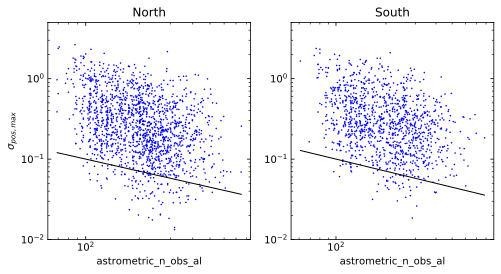

In [10]:
fig, (ax0, ax1) = plt.subplots(figsize=(8, 4), ncols=2)

# quasars in the north
# eema vs NO. obs
ax0.plot(gdr2nor["astrometric_n_obs_al"], gdr2nor["pos_err"], "bx", ms=1)

# Gaussian-like formal
y = 1 / np.sqrt(gdr2nor["astrometric_n_obs_al"])
ax0.plot(gdr2nor["astrometric_n_obs_al"], y, "k-", label="", lw=1)

ax0.set_yscale("log")
ax0.set_xscale("log")
ax0.set_xlabel("astrometric_n_obs_al")
ax0.set_ylabel("$\\sigma_{pos,max}$")
ax0.set_ylim([0.01, 5])
ax0.yaxis.set_ticks_position("both")
ax0.xaxis.set_ticks_position("both")
# ax0.legend()
ax0.set_title("North")

# quasars in the south
# eema vs NO. obs
ax1.plot(gdr2sou["astrometric_n_obs_al"], gdr2sou["pos_err"], "bx", ms=1)

# Gaussian-like formal
y = 1 / np.sqrt(gdr2sou["astrometric_n_obs_al"])
ax1.plot(gdr2sou["astrometric_n_obs_al"], y, "k-", label="", lw=1)

ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.set_xlabel("astrometric_n_obs_al")
ax1.set_ylim([0.01, 5])
ax1.yaxis.set_ticks_position("both")
ax1.xaxis.set_ticks_position("both")
ax1.set_title("South")